In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import sys
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
import statsmodels.api as sm

In [5]:
data = pd.read_csv('./Churn_Telecom.csv')
data. head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
data['churn'].value_counts(normalize = True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

In [4]:
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Dataset Unique Values

In [8]:
for col in data.columns:
    print(col)
    print(np.sort(data[col].unique()))
    print('')

state
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']

account length
[  1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 

<AxesSubplot:xlabel='state'>

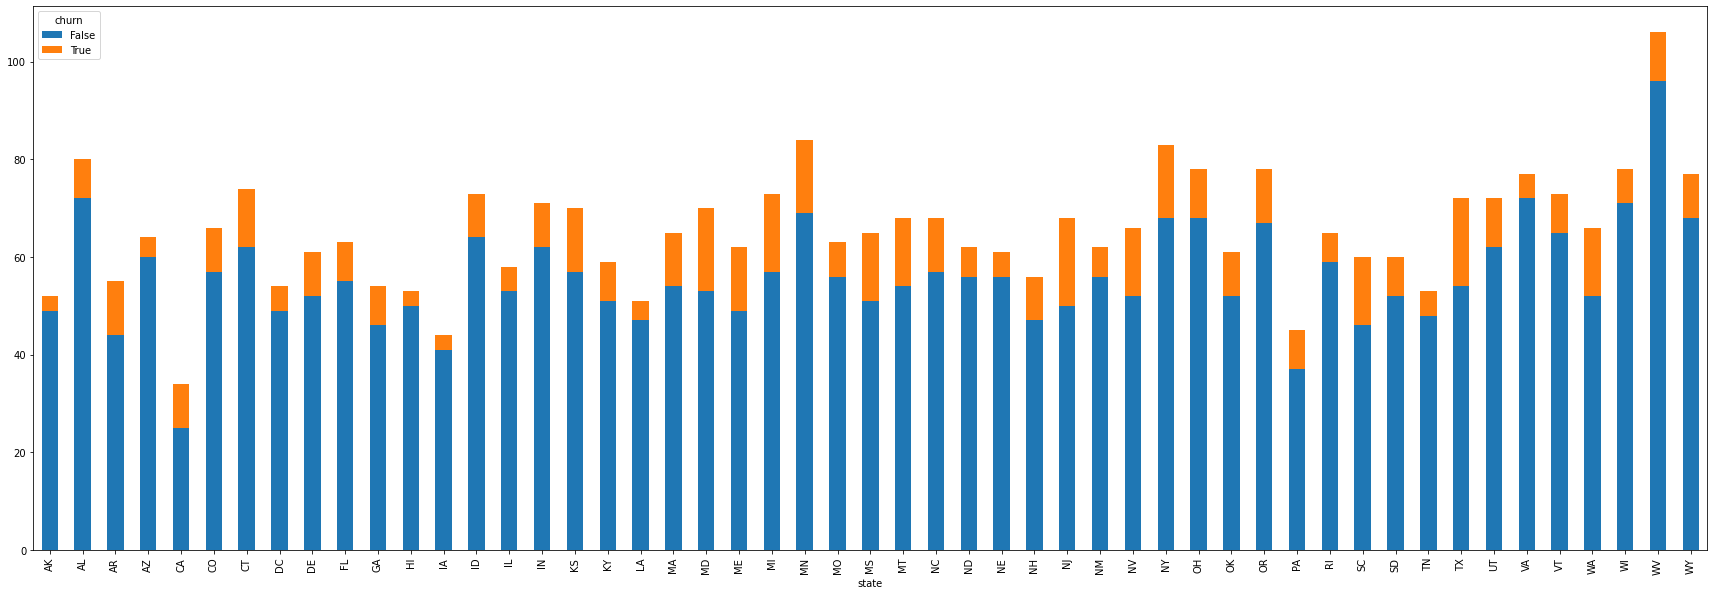

In [6]:
data.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

#### Change field names and replace space with underscore

In [9]:
# Rename columns, replace space with underscore
new_columns = [i.replace(' ', '_') for i in data.columns]
data.columns = new_columns

#### Analyze `phone_number` feature

In [11]:
sum(data.groupby('phone_number').count()['area_code'] > 1)

0

 Dataset contains one row per phone number

#### Categorical Features Analysis

In [16]:
def bar_chart_count(df, column, count_column):
    """
    Plot bar chart of a given column with the frequency of each unique value.

    Args:
      df(pandas.DataFrame): DataFrame with the columns and data
      column(str): Column Name to plot
      count_column(str): Any other column just to count the No. of Customers
    """
    # Calculate No. of Customers by Column
    to_plot = df.groupby(column).count()[count_column].sort_values(ascending=False).reset_index()

    # Create Figure and Chart
    plt.figure(figsize=(20,7))
    plt.bar(to_plot[column], to_plot[count_column])
    
    # Add Title and Labels
    plt.title(f'No. of Customers by {column.replace("_", " ").title()}', size=15)
    plt.xlabel(column, size=14)
    plt.ylabel('No. of Customers', size=14)
    
    plt.show();

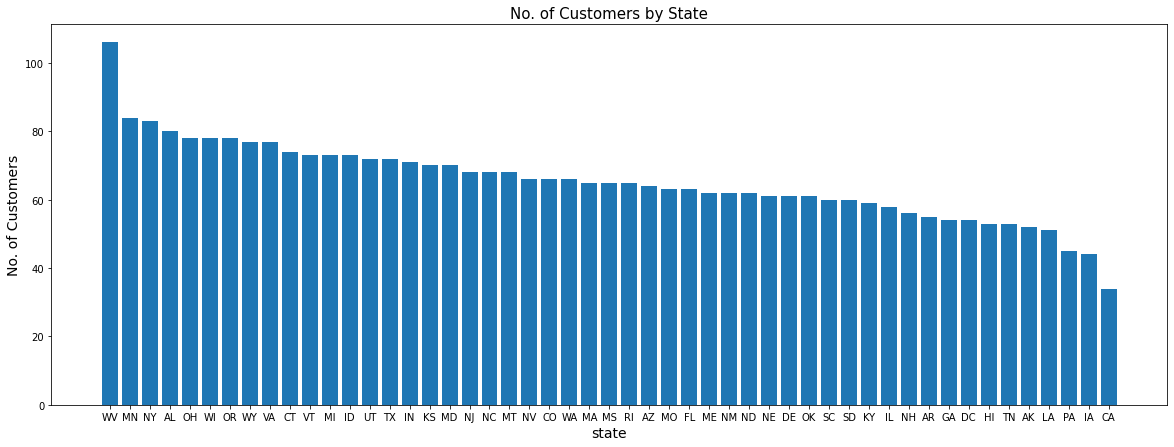

In [17]:
# No. of Customers by State 
bar_chart_count(data, 'state', 'area_code')

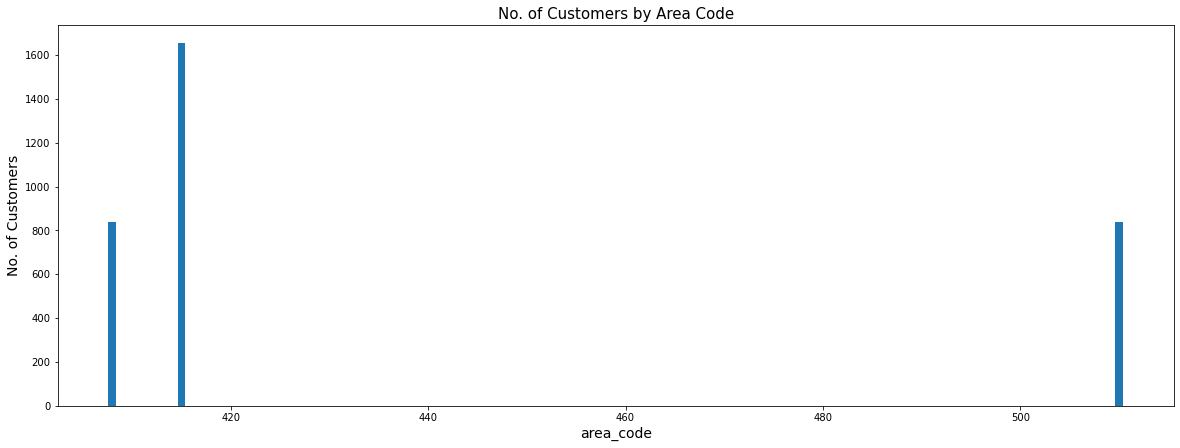

In [18]:
bar_chart_count(data, 'area_code', 'phone_number')

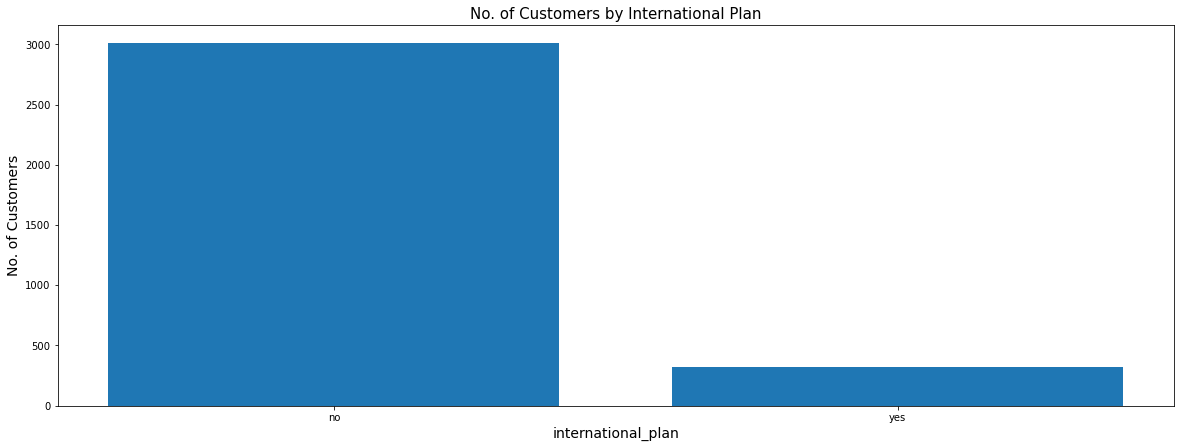

In [20]:
bar_chart_count(data, 'international_plan', 'phone_number')

<AxesSubplot:xlabel='area code'>

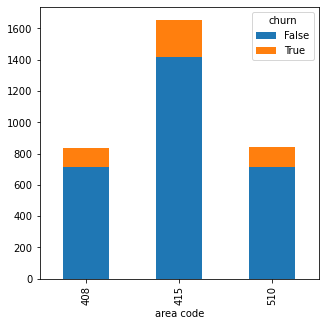

In [7]:
data.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

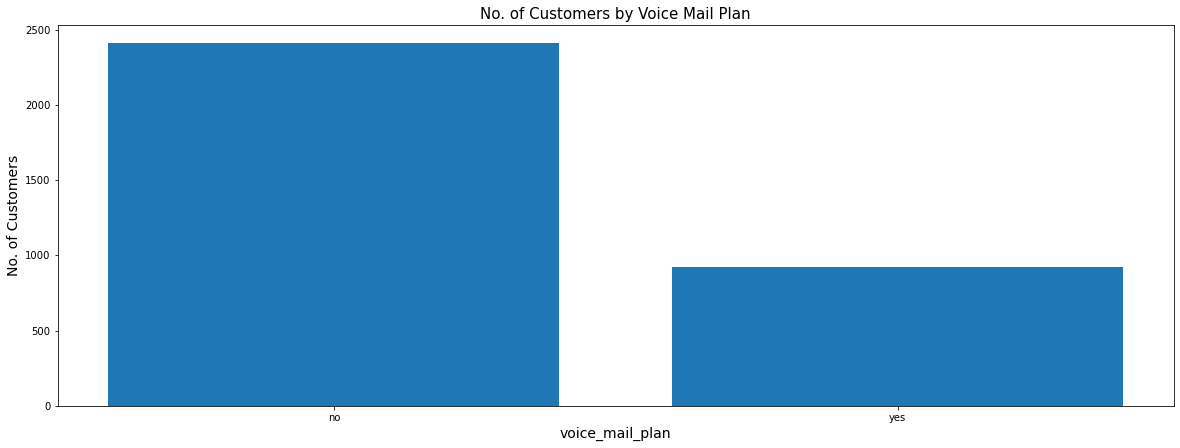

In [22]:
bar_chart_count(data, 'voice_mail_plan', 'phone_number')

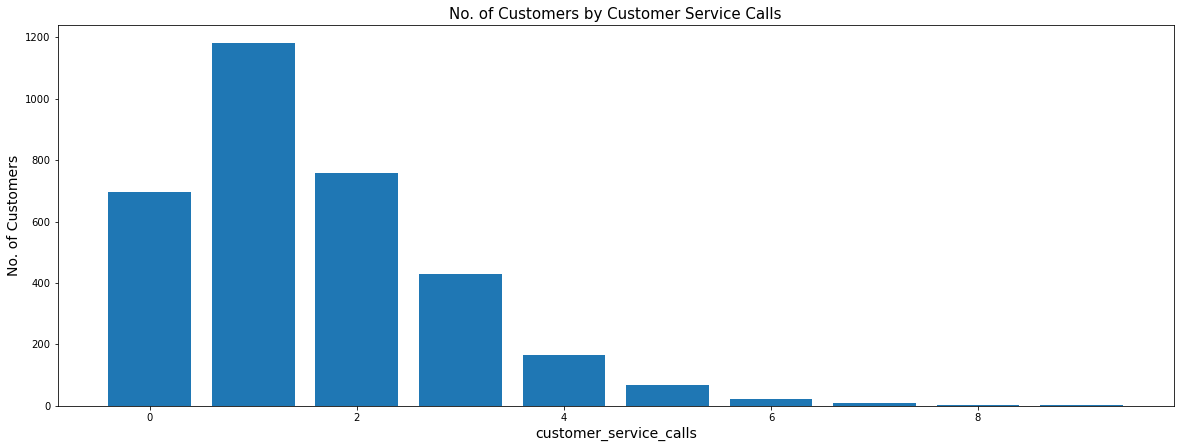

In [23]:
bar_chart_count(data, 'customer_service_calls', 'phone_number')

- It's possible to see a positively skewed distribution for the No. of Customer Service Calls. Indicating that most clients don't reach out to Customer Service more than once or twice.


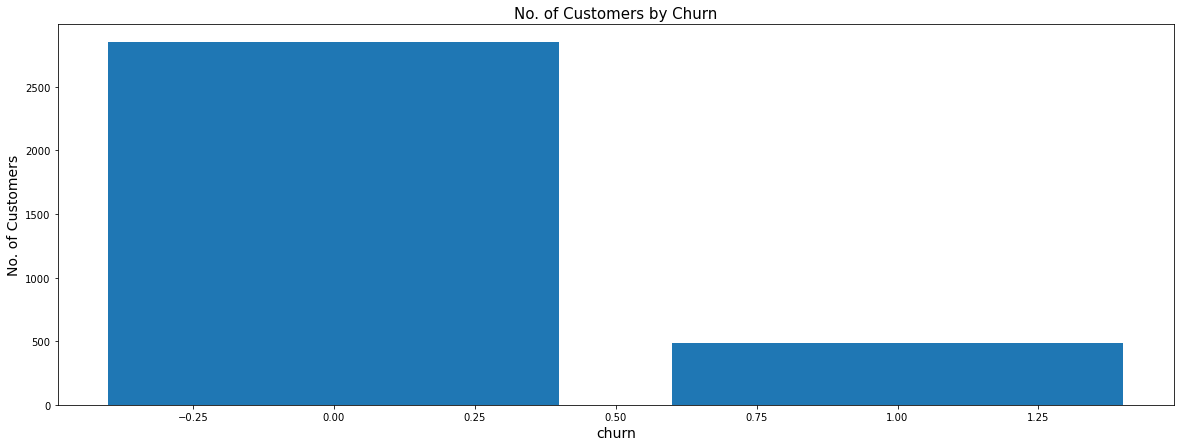

In [24]:
bar_chart_count(data, 'churn', 'phone_number')

#### Conclusions:
- Most of records are of non-churned clients. This will be fixed that while training the model so that it will just predict everything as "not churned" and will have a high accuracy score.

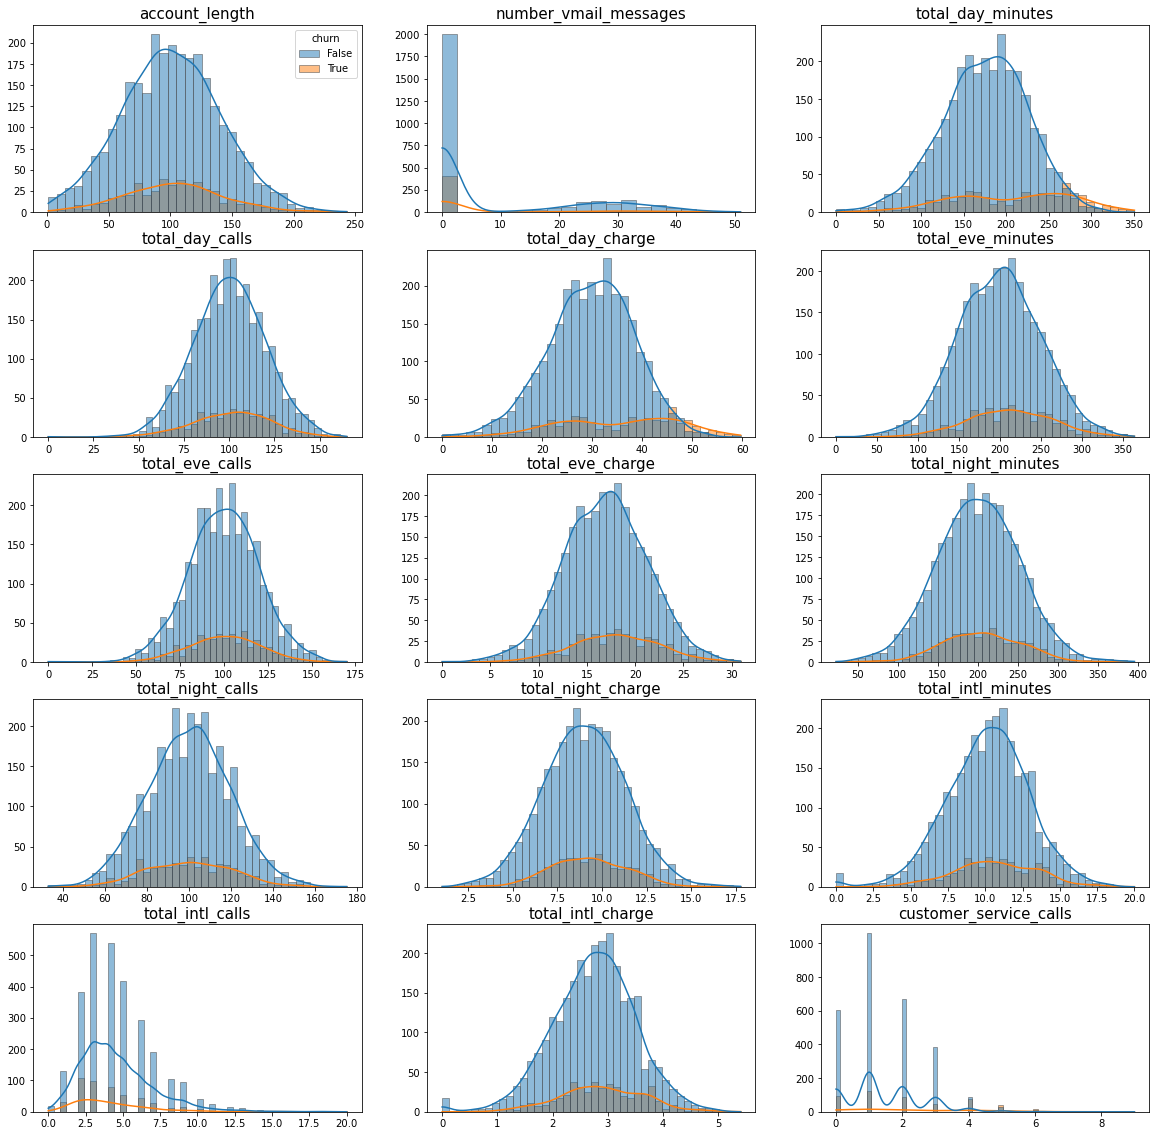

In [28]:
# Define columns to plot
columns_plot = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 
                'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 
                'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 
                'total_intl_calls', 'total_intl_charge', 'customer_service_calls']

# Create Figure and Axes
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,20))

# Loop through columns
for idx, col in enumerate(columns_plot):
    
    # Calculate chart position
    col_n = idx % 3
    row_n = idx // 3
    
    # Plot Histogram, depending on the subplot I'm going to add a legend or not
    if col_n == 0 and row_n == 0:
        sns.histplot(data=data, x=col, hue="churn", multiple="layer", edgecolor=".3", 
                     linewidth=.5, ax=axes[row_n][col_n], kde=True)
    else:
        sns.histplot(data=data, x=col, hue="churn", multiple="layer", edgecolor=".3", 
                     linewidth=.5, ax=axes[row_n][col_n], kde=True, legend=None)
    
    # Set Labels and titles
    axes[row_n][col_n].set_ylabel(None)
    axes[row_n][col_n].set_xlabel(None)
    axes[row_n][col_n].set_title(col, size=15)

plt.show();

#### Conclusions:
- Features are mostly normally distributed but they are in different scales which can negatively impact the model depending on the algorithm.
- Churned clients seem to have a higher median for `total_day_minutes`.
- Most of the customers don't have Voice Mail messages.

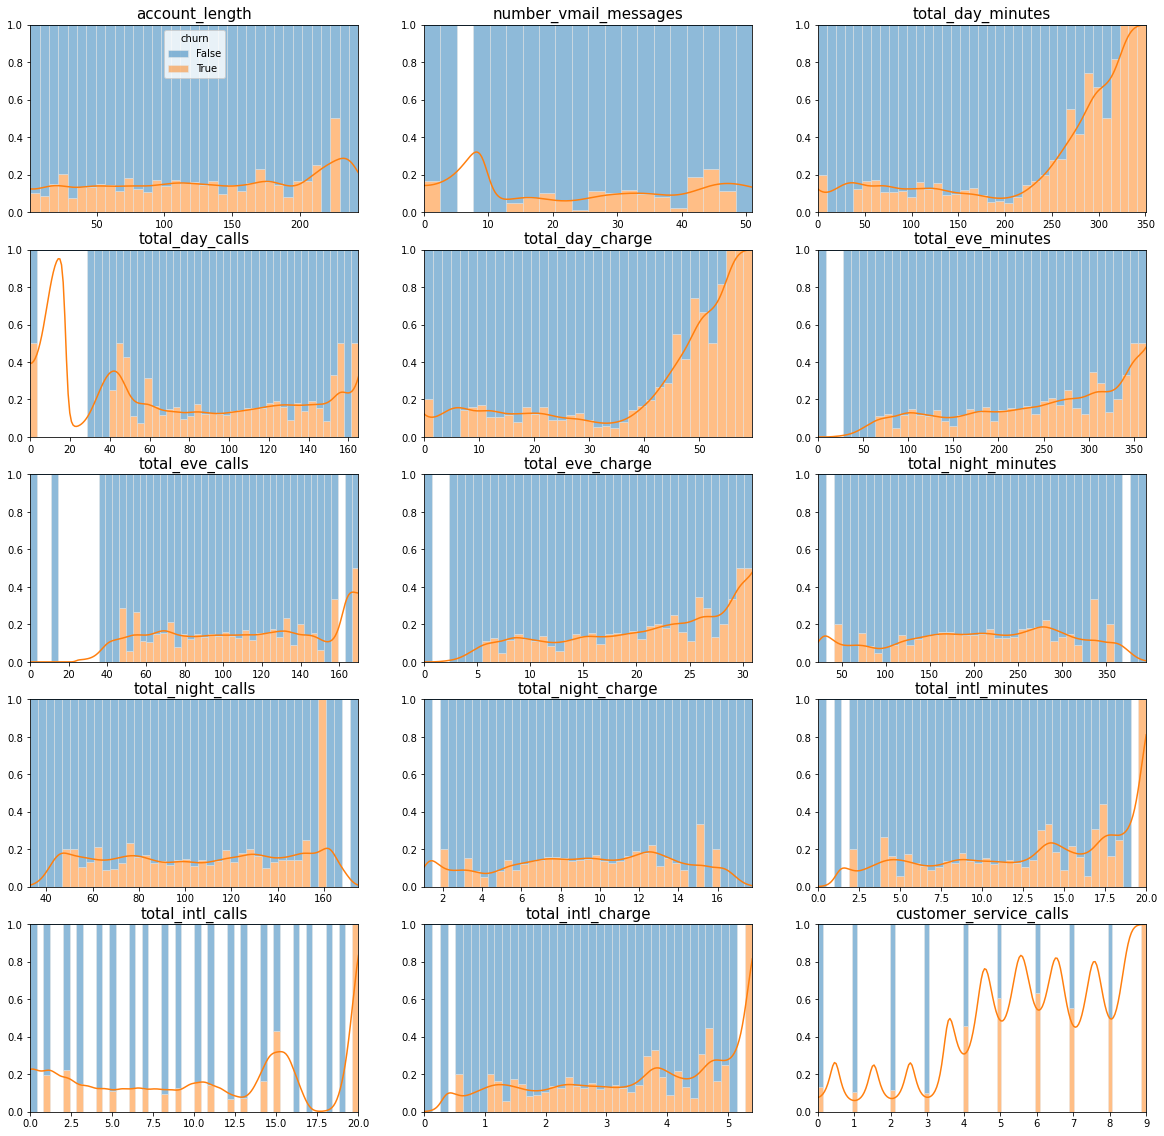

In [30]:
# Create Figure and Axes
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,20))

# Loop through columns
for idx, col in enumerate(columns_plot):
    
    # Calculate chart position
    col_n = idx % 3
    row_n = idx // 3
    
    # Plot Histogram, depending on the subplot I'm going to add a legend or not
    if col_n == 0 and row_n == 0:
        sns.histplot(data=data, x=col, hue="churn", multiple="fill", edgecolor=".9", 
                     linewidth=.5, ax=axes[row_n][col_n], kde=True)
    else:
        sns.histplot(data=data, x=col, hue="churn", multiple="fill", edgecolor=".9", 
                     linewidth=.5, ax=axes[row_n][col_n], kde=True, legend=None)
    
    # Set Labels and titles
    axes[row_n][col_n].set_ylabel(None)
    axes[row_n][col_n].set_xlabel(None)
    axes[row_n][col_n].set_title(col, size=15)

plt.show();

#### Conclusions:
- `total_day_minutes` and `total_day_charge` mainly have mainly churned clients.
- Also, `total_eve_minutes` and `total_eve_charge` on a smaller scale have mainly churned clients.
- Increased no. of `customer_service_calls` is in sync with the probability of it being churned increases as well.

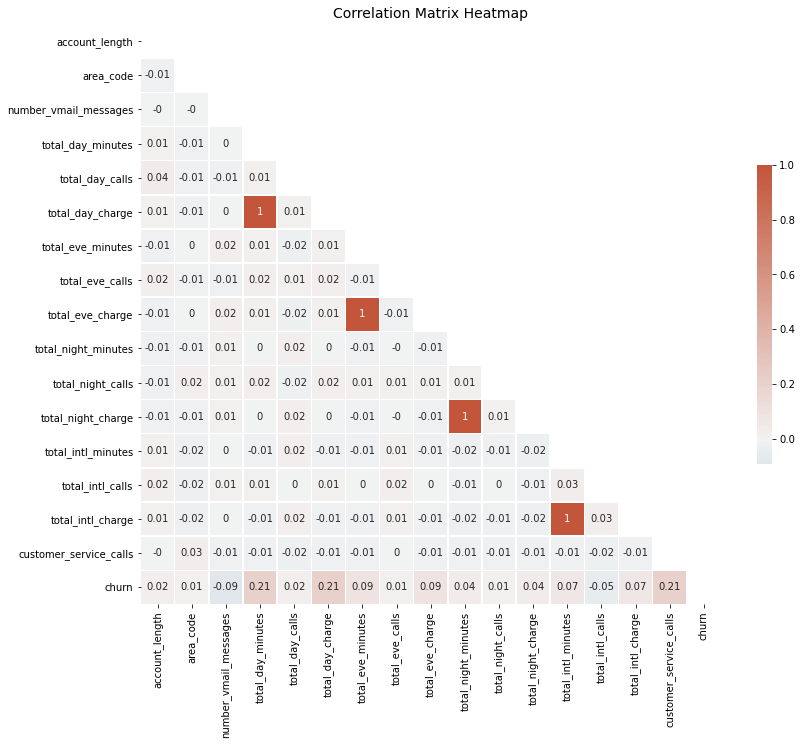

In [32]:
# Correlation numbers
corr = data.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Title
plt.title('Correlation Matrix Heatmap', size=14);

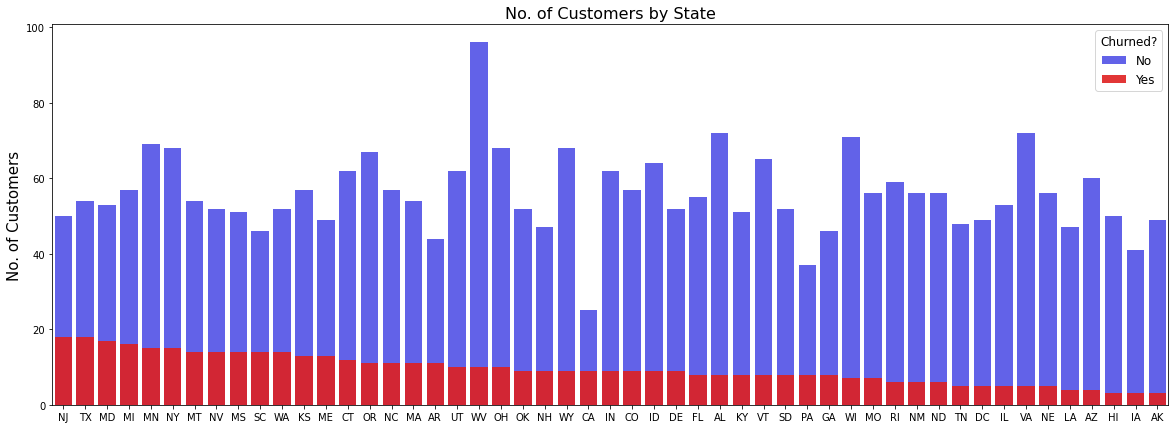

In [35]:
# Calculate No. of Customers by State by Churn Status
# Create a Pivot Table to Plot, rename columns and sort values
to_plot = data.pivot_table(index='state', columns='churn', values='area_code', aggfunc='count').reset_index()
to_plot.columns = ['state', 'false', 'true']
to_plot = to_plot.sort_values('true', ascending=False).reset_index(drop=True)

# Plot
plt.figure(figsize=(20,7))

# Two bar charts
s1 = sns.barplot(x = 'state', y = 'false', data = to_plot, color = 'blue', alpha=0.7, label='No')
s2 = sns.barplot(x = 'state', y = 'true', data = to_plot, color = 'red', alpha=0.9, label='Yes')

# Title, labels and legend
plt.title('No. of Customers by State', size=16)
plt.ylabel('No. of Customers', size=15)
plt.xlabel(None)
plt.legend(title='Churned?', prop={'size': 12}, title_fontsize=12)

plt.show();

#### Conclusions:
- Churn rate differs almost uniformly.
- Class imbalance is evidently visible.

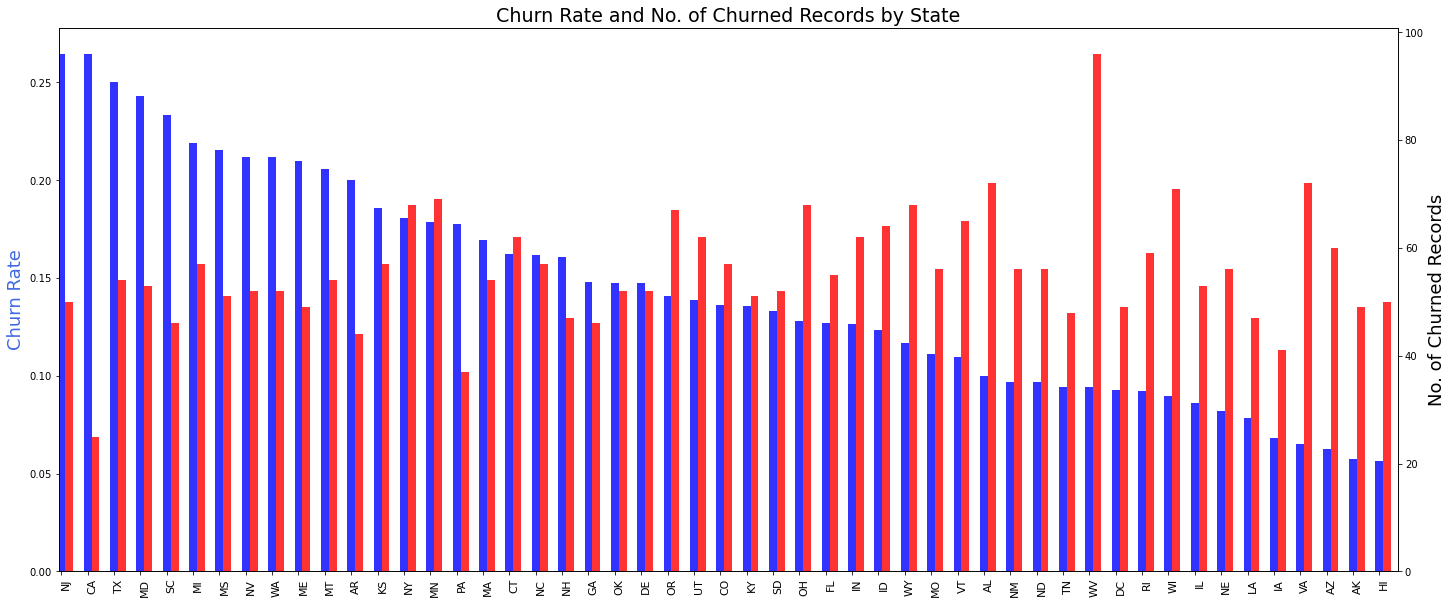

In [38]:
# Create Figure
fig = plt.figure(figsize=(24,10))

# Create matplotlib axes and secondary axes
ax = fig.add_subplot(111) 
ax2 = ax.twinx()

# Plot
width = 0.3
to_plot.plot.bar('state', 'churn_rate', legend=False, width=width,
                   ax=ax, position=1, align='edge', color='blue', alpha=0.8)
to_plot.plot.bar('state', 'false', legend=False, width=width,
                   ax=ax2, position=0, align='edge', color='red', alpha=0.8)

# Create Title and Labels.
plt.title('Churn Rate and No. of Churned Records by State', size=19)
ax.set_ylabel('Churn Rate', color='royalblue', size=18)
ax2.set_ylabel('No. of Churned Records', size=18)
ax.set_xlabel(None)
ax2.set_xlabel(None)
ax.set_xticklabels(to_plot['state'], fontsize = 11, ha='left')

plt.show();

In [39]:
# Calculate Totals
data['total_minutes'] = (data['total_day_minutes'] + data['total_eve_minutes'] + 
                       data['total_intl_minutes'] + data['total_night_minutes'])
data['total_calls'] = (data['total_day_calls'] + data['total_eve_calls'] + 
                     data['total_intl_calls'] + data['total_night_calls'])
data['total_charge'] = (data['total_day_charge'] + data['total_eve_charge'] + 
                      data['total_intl_charge'] + data['total_night_charge'])     

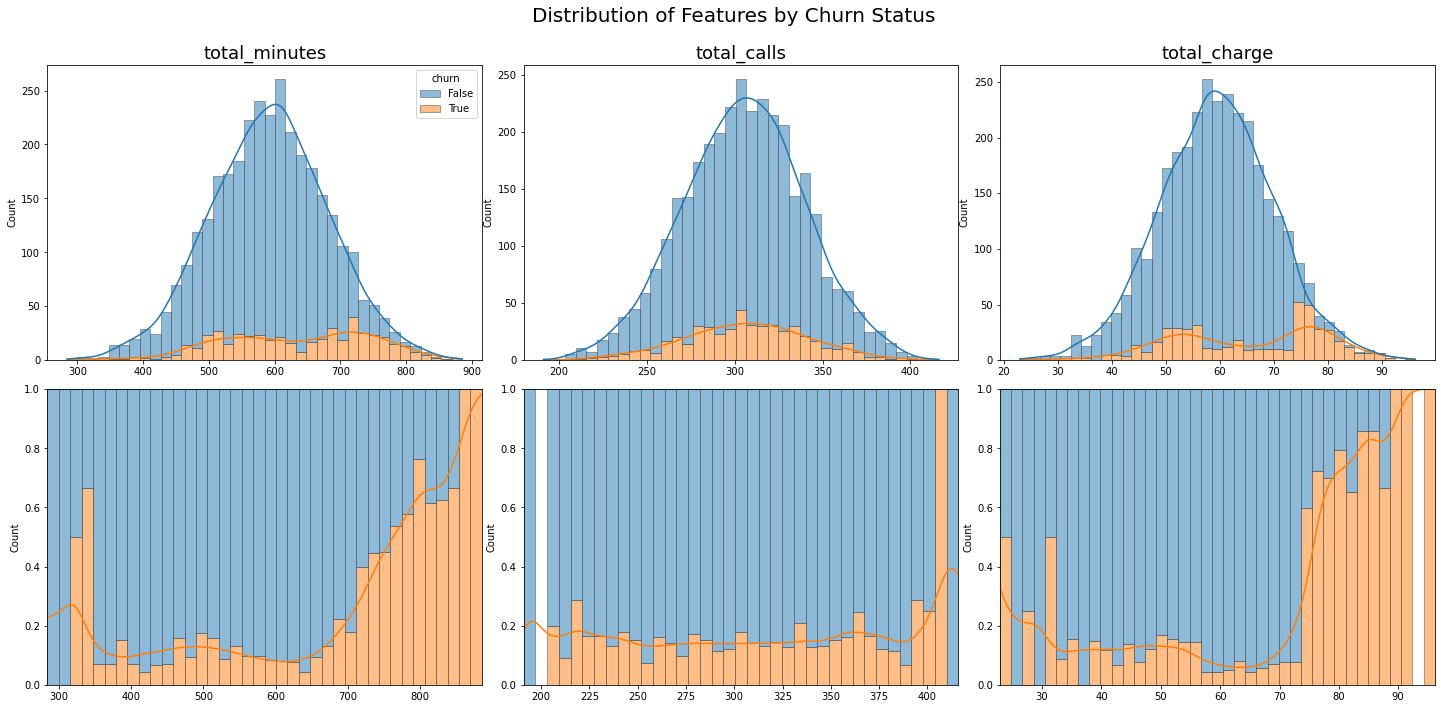

In [40]:
# Create Figure and Axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

# Tight Layout of Figure - Make charts closer to each other
fig.tight_layout()

# Loop through columns
for idx, col in enumerate(['total_minutes', 'total_calls', 'total_charge']):
    
    # If first column and first row then then include the legend
    # First Row Chart: Stacked Histogram
    if idx == 0:
        sns.histplot(data=data, x=col, hue="churn", multiple="stack", edgecolor=".3", 
                     linewidth=.5, ax=axes[0][idx], kde=True)
    else:
        sns.histplot(data=data, x=col, hue="churn", multiple="stack", edgecolor=".3", 
                     linewidth=.5, ax=axes[0][idx], kde=True, legend=None)
        
    # Second Row Chart: Filled Histogram
    sns.histplot(data=data, x=col, hue="churn", multiple="fill", edgecolor=".3", 
                 linewidth=.5, ax=axes[1][idx], kde=True, legend=None)
    
    # Adjust Labels and Title
    axes[0][idx].set_xlabel(None)
    axes[1][idx].set_xlabel(None)
    axes[0][idx].set_title(col, size=18)
    
# Set Title
fig.suptitle("Distribution of Features by Churn Status", fontsize=20)

# Adjust Header Space
plt.subplots_adjust(top=0.90)
plt.show();

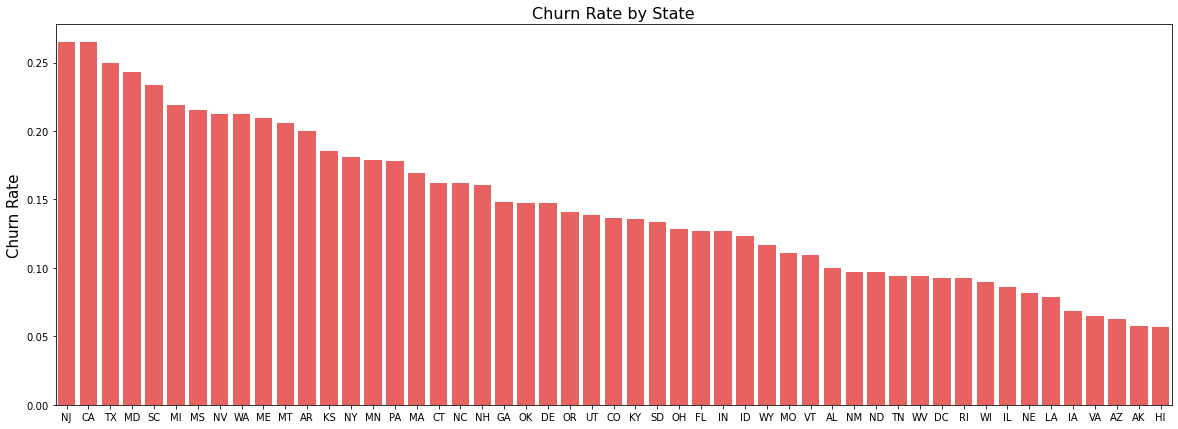

In [36]:
# Calculate Churn Rate by State
# Create a Pivot Table to Plot, rename columns and sort values
to_plot['total'] = to_plot['true'] + to_plot['false']
to_plot['churn_rate'] = to_plot['true'] / to_plot['total']
to_plot = to_plot.sort_values('churn_rate', ascending=False).reset_index(drop=True)

# Plot
plt.figure(figsize=(20,7))

# Create Bar Plot
sns.barplot(x = 'state', y = 'churn_rate', data = to_plot, color = 'red', alpha=0.7)

# Title and labels
plt.title('Churn Rate by State', size=16)
plt.ylabel('Churn Rate', size=15)
plt.xlabel(None)

plt.show();

<AxesSubplot:xlabel='international plan'>

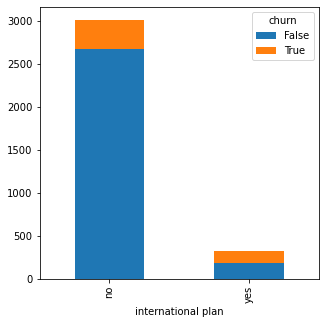

In [8]:
data.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

In [25]:
data['churn']

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: churn, Length: 3333, dtype: bool

<AxesSubplot:xlabel='voice mail plan'>

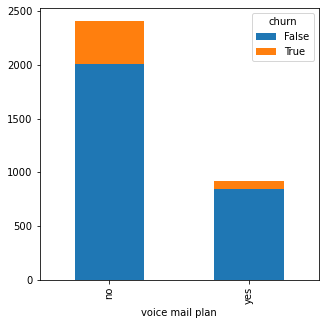

In [9]:
data.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

In [10]:
data['area code'] = data['area code'].astype('object')

Preprocessing

In [11]:
from prep import preprocess
X, y = preprocess(data)

Handle Categorical Cols - Label Encode

In [12]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()

In [13]:
# State is string and we want discreet integer values
# data['state'] = label_encoder.fit_transform(data['state'])
# data['international plan'] = label_encoder.fit_transform(data['international plan'])
# data['voice mail plan'] = label_encoder.fit_transform(data['voice mail plan'])

# #print (df['Voice mail plan'][:4])
# print (data.dtypes)


state                       int64
account length              int64
area code                  object
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [14]:
# y = data['churn'].astype(np.int)

# X = data.drop(['churn', 'phone number'], axis=1)

In [15]:
# X.dtypes

Scaling

In [16]:
# scaler = preprocessing.StandardScaler()
# X = scaler.fit_transform(X)

In [17]:
data.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [18]:
from sklearn.model_selection import StratifiedKFold
# Using the Strafied Cross Validation since there is a class imbalance

In [19]:
def stratified_cv(X, y, clf_class, shuffle=True, n_splits=10, **kwargs):
    stratified_k_fold = StratifiedKFold(n_splits=n_splits)
    y_pred = y.copy()

    for ii,jj in stratified_k_fold.split(X, y):
            
        y_train = y[ii]
        X_train, X_test = X[ii], X[jj]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

Accuracy scores for the basic models.

In [20]:
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))

Gradient Boosting Classifier:  0.95
Support vector machine(SVM):   0.91
Random Forest Classifier:      0.95
K Nearest Neighbor Classifier: 0.89
Logistic Regression:           0.86


In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))

0.8591086411681378

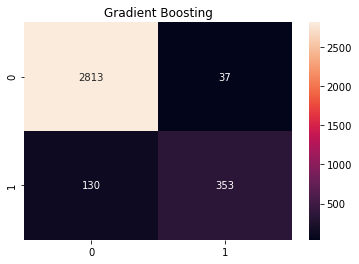

In [22]:
grad_ens_conf_matrix      = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))
sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
title = 'Gradient Boosting'
plt.title(title);

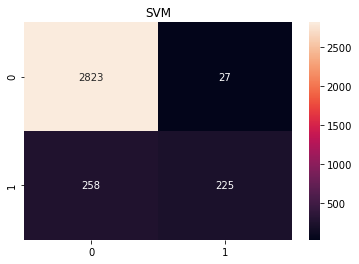

In [23]:
svm_svc_conf_matrix       = metrics.confusion_matrix(y, stratified_cv(X, y, svm.SVC))
sns.heatmap(svm_svc_conf_matrix, annot=True,  fmt='');
title = 'SVM'
plt.title(title);

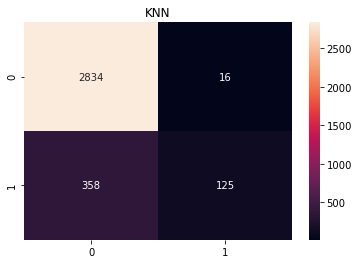

In [24]:
k_neighbors_conf_matrix   = metrics.confusion_matrix(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))
sns.heatmap(k_neighbors_conf_matrix, annot=True,  fmt='');
title = 'KNN'
plt.title(title);

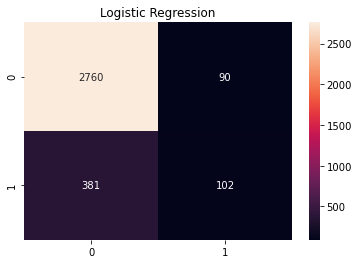

In [25]:
logistic_reg_conf_matrix  = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.LogisticRegression))
sns.heatmap(logistic_reg_conf_matrix, annot=True,  fmt='');
title = 'Logistic Regression'
plt.title(title);


Classification Reports

In [26]:
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, linear_model.LogisticRegression))))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

       False       0.96      0.99      0.97      2850
        True       0.90      0.73      0.81       483

    accuracy                           0.95      3333
   macro avg       0.93      0.86      0.89      3333
weighted avg       0.95      0.95      0.95      3333


Support vector machine(SVM):
               precision    recall  f1-score   support

       False       0.92      0.99      0.95      2850
        True       0.89      0.47      0.61       483

    accuracy                           0.91      3333
   macro avg       0.90      0.73      0.78      3333
weighted avg       0.91      0.91      0.90      3333


Random Forest Classifier:
               precision    recall  f1-score   support

       False       0.94      0.99      0.97      2850
        True       0.94      0.64      0.76       483

    accuracy                           0.94      3333
   macro avg       0.94      0.82     

In [27]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier()

In [28]:
data.shape

(3333, 20)

In [29]:
data = data.drop(['churn', 'phone number'], axis =1)

KeyError: "['phone number'] not found in axis"

In [ ]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=data.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

In [ ]:
from prep import preprocess
df= pd.read_csv('./Data/Churn_in_Telecom.csv')
df.dtypes

In [ ]:
preprocess(df)